## Decision Tree

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Data/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
x_train = data.iloc[::,:-1]
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [9]:
x_train.Sex = x_train.Sex.replace("F", 1)
x_train.Sex = x_train.Sex.replace("M", 0)
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,HIGH,HIGH,25.355
1,47,0,LOW,HIGH,13.093
2,47,0,LOW,HIGH,10.114
3,28,1,NORMAL,HIGH,7.798
4,61,1,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567
196,16,0,LOW,HIGH,12.006
197,52,0,NORMAL,HIGH,9.894
198,23,0,NORMAL,NORMAL,14.020


In [11]:
x_train.BP.unique()
x_train.BP = x_train.BP.replace("LOW", 0)
x_train.BP = x_train.BP.replace("NORMAL", 1)
x_train.BP = x_train.BP.replace("HIGH", 2)
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,HIGH,25.355
1,47,0,0,HIGH,13.093
2,47,0,0,HIGH,10.114
3,28,1,1,HIGH,7.798
4,61,1,0,HIGH,18.043
...,...,...,...,...,...
195,56,1,0,HIGH,11.567
196,16,0,0,HIGH,12.006
197,52,0,1,HIGH,9.894
198,23,0,1,NORMAL,14.020


In [13]:
x_train.Cholesterol = x_train.Cholesterol.replace("HIGH", 1)
x_train.Cholesterol = x_train.Cholesterol.replace("NORMAL", 0)
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,1,1,1,7.798
4,61,1,0,1,18.043
...,...,...,...,...,...
195,56,1,0,1,11.567
196,16,0,0,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [16]:
y_train = data.iloc[::,-1]
y_train

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [19]:
x_test = x_train.iloc[-10:]
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
190,58,0,2,1,18.991
191,23,0,2,1,8.011
192,72,0,0,1,16.310
193,72,0,0,1,6.769
194,46,1,2,1,34.686
195,56,1,0,1,11.567
196,16,0,0,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020
199,40,1,0,0,11.349


In [17]:
model = tree.DecisionTreeClassifier(criterion='gini')
# for classification, here you can change the algorithm as gini or entropy (information gain) by defauly, it is gini.
# model = tree.DecisionTreeRegressor() for regression
model.fit(x_train, y_train)
print("Score:",model.score(x_train, y_train))

Fit: DecisionTreeClassifier()
Score: 1.0


In [20]:
predicted = model.predict(x_test)
predicted

array(['drugY', 'drugA', 'drugY', 'drugC', 'drugY', 'drugC', 'drugC',
       'drugX', 'drugX', 'drugX'], dtype=object)

In [21]:
data[-10:]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,drugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [23, 16, 16, 54, 0]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 16, 54, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 16, 18, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsampl

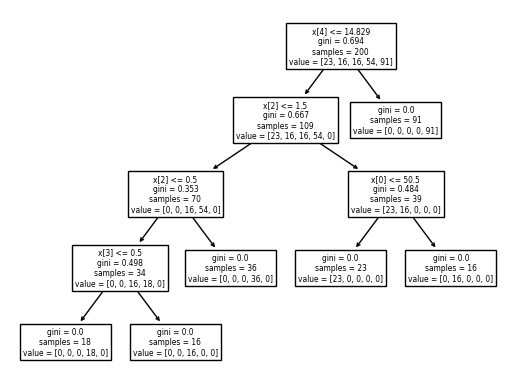

In [22]:
tree.plot_tree(model)